In [10]:
import pandas as pd
import re

Train = pd.read_csv(r"C:\Users\epava\OneDrive\Documents\NLP\Project\Train\Train.csv")

data=Train
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [11]:
data['new_text'] = data.text.str.replace('@user', '')
data['new_text'] = data['new_text'].str.replace("[^a-zA-Z#]", " ")
data['new_text'] = data['new_text'].str.replace("#", "")
data.head()

C:\Users\epava\AppData\Local\Temp\ipykernel_41128\2894827961.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['new_text'] = data['new_text'].str.replace("[^a-zA-Z#]", " ")


,text,label,new_text
0,I grew up (b. 1965) watching and loving the Th...,0,I grew up b watching and loving the Th...
1,"When I put this movie in my DVD player, and sa...",0,When I put this movie in my DVD player and sa...
2,Why do people who do not know what a particula...,0,Why do people who do not know what a particula...
3,Even though I have great interest in Biblical ...,0,Even though I have great interest in Biblical ...
4,Im a die hard Dads Army fan and nothing will e...,1,Im a die hard Dads Army fan and nothing will e...


In [12]:
data['new_text'] = data['new_text'].apply(lambda x: x.split())
data.head()

,text,label,new_text
0,I grew up (b. 1965) watching and loving the Th...,0,"[I, grew, up, b, watching, and, loving, the, T..."
1,"When I put this movie in my DVD player, and sa...",0,"[When, I, put, this, movie, in, my, DVD, playe..."
2,Why do people who do not know what a particula...,0,"[Why, do, people, who, do, not, know, what, a,..."
3,Even though I have great interest in Biblical ...,0,"[Even, though, I, have, great, interest, in, B..."
4,Im a die hard Dads Army fan and nothing will e...,1,"[Im, a, die, hard, Dads, Army, fan, and, nothi..."


In [13]:
#stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
data['new_text']= data['new_text'].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

,text,label,new_text
0,I grew up (b. 1965) watching and loving the Th...,0,"[i, grew, up, b, watch, and, love, the, thunde..."
1,"When I put this movie in my DVD player, and sa...",0,"[when, i, put, this, movi, in, my, dvd, player..."
2,Why do people who do not know what a particula...,0,"[whi, do, peopl, who, do, not, know, what, a, ..."
3,Even though I have great interest in Biblical ...,0,"[even, though, i, have, great, interest, in, b..."
4,Im a die hard Dads Army fan and nothing will e...,1,"[im, a, die, hard, dad, armi, fan, and, noth, ..."


In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = nltk.corpus.stopwords.words('english')
import string
def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]
data['new_text'] = data['new_text'].apply(process)

In [18]:
#Split data into training and testing sets 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =     train_test_split(data["new_text"], 
      data["label"], test_size = 0.2, random_state = 42)

x_train = x_train.apply(lambda x: ' '.join(x))
x_test = x_test.apply(lambda x: ' '.join(x))

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)
print(x_train_counts.shape)
print(x_train_tfidf.shape)
#Output :(25569, 27304) (25569, 27304)
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)
print(x_test_counts.shape)
print(x_test_tfidf.shape)
#Output : (6393, 27304) (6393, 27304)

(32000, 56132)
(32000, 56132)
(8000, 56132)
(8000, 56132)


In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)
predictions = model.predict(x_test_tfidf)

#Confusion Matrix 
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)



array([[3381,  585],
       [ 627, 3407]], dtype=int64)

In [23]:
#f1-score
f1_score(y_test,predictions)

0.8489907799651135

In [24]:
#Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

84.85000000000001

C:\Users\epava\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


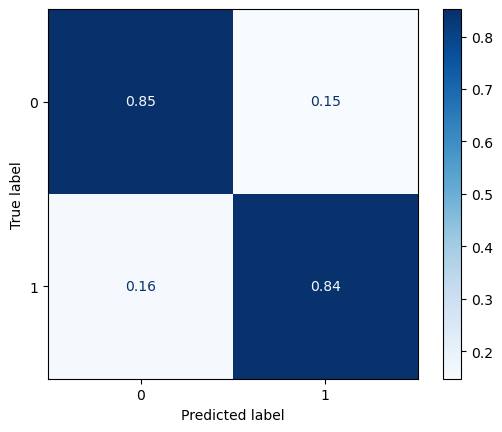

In [30]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(model, x_test_tfidf, y_test, display_labels=[0,1], cmap=plt.cm.Blues, normalize='true')